In [1]:
from transitions import Machine
import random

class NarcolepticSuperhero(object):

    # Define some states. Most of the time, narcoleptic superheroes are just like
    # everyone else. Except for...
    states = ['asleep', 'hanging out', 'hungry', 'sweaty', 'saving the world']

    def __init__(self, name):

        # No anonymous superheroes on my watch! Every narcoleptic superhero gets
        # a name. Any name at all. SleepyMan. SlumberGirl. You get the idea.
        self.name = name

        # What have we accomplished today?
        self.kittens_rescued = 0

        # Initialize the state machine
        self.machine = Machine(model=self, states=NarcolepticSuperhero.states, initial='asleep')

        # Add some transitions. We could also define these using a static list of
        # dictionaries, as we did with states above, and then pass the list to
        # the Machine initializer as the transitions= argument.

        # At some point, every superhero must rise and shine.
        self.machine.add_transition(trigger='wake_up', source='asleep', dest='hanging out')

        # Superheroes need to keep in shape.
        self.machine.add_transition('work_out', 'hanging out', 'hungry')

        # Those calories won't replenish themselves!
        self.machine.add_transition('eat', 'hungry', 'hanging out')

        # Superheroes are always on call. ALWAYS. But they're not always
        # dressed in work-appropriate clothing.
        self.machine.add_transition('distress_call', '*', 'saving the world',
                         before='change_into_super_secret_costume')

        # When they get off work, they're all sweaty and disgusting. But before
        # they do anything else, they have to meticulously log their latest
        # escapades. Because the legal department says so.
        self.machine.add_transition('complete_mission', 'saving the world', 'sweaty',
                         after='update_journal')

        # Sweat is a disorder that can be remedied with water.
        # Unless you've had a particularly long day, in which case... bed time!
        self.machine.add_transition('clean_up', 'sweaty', 'asleep', conditions=['is_exhausted'])
        self.machine.add_transition('clean_up', 'sweaty', 'hanging out')

        # Our NarcolepticSuperhero can fall asleep at pretty much any time.
        self.machine.add_transition('nap', '*', 'asleep')

    def update_journal(self):
        """ Dear Diary, today I saved Mr. Whiskers. Again. """
        self.kittens_rescued += 1

    @property
    def is_exhausted(self):
        """ Basically a coin toss. """
        return random.random() < 0.5

    def change_into_super_secret_costume(self):
        print("Beauty, eh?")

In [2]:
batman = NarcolepticSuperhero("Batman")

In [3]:
batman.state

'asleep'

In [4]:
batman.wake_up()

True

In [5]:
batman.state

'hanging out'

In [6]:
batman.distress_call()

Beauty, eh?


True

In [7]:
batman.state

'saving the world'

In [8]:
batman.complete_mission()

True

In [9]:
batman.kittens_rescued

1

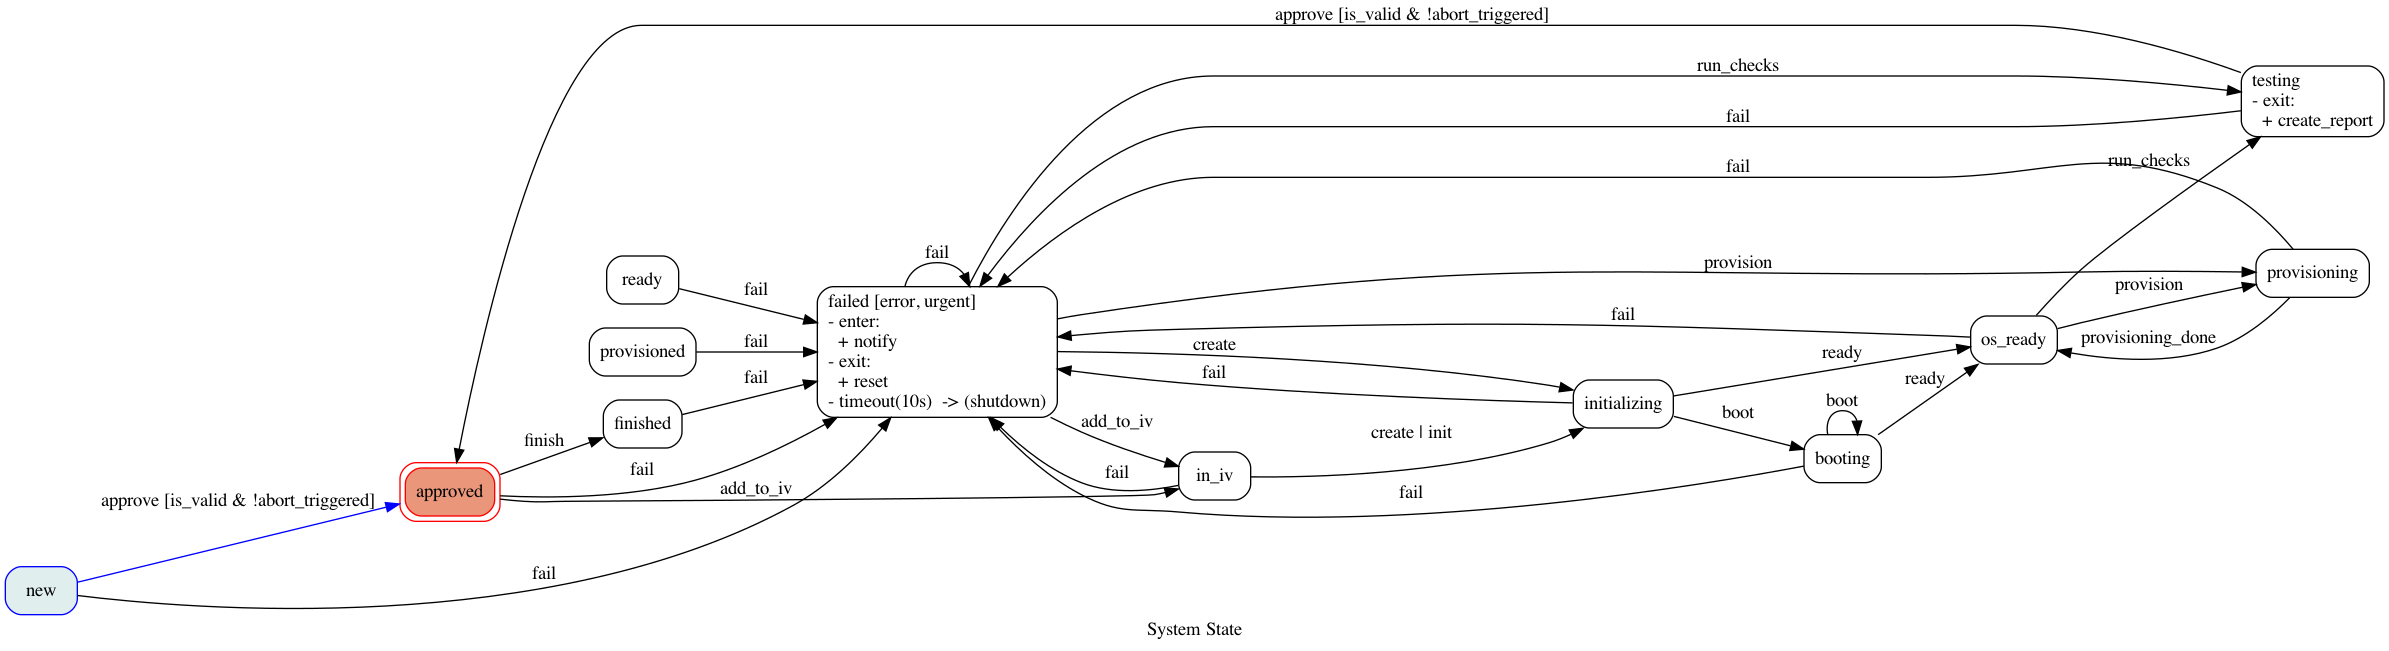

In [10]:
from transitions.extensions.states import Timeout, Tags, add_state_features
from transitions.extensions.diagrams import GraphMachine

import io
from IPython.display import Image, display, display_png


@add_state_features(Timeout, Tags)
class CustomMachine(GraphMachine):
    pass


states = ['new', 'approved', 'ready', 'finished', 'provisioned',
          {'name': 'failed', 'on_enter': 'notify', 'on_exit': 'reset',
           'tags': ['error', 'urgent'], 'timeout': 10, 'on_timeout': 'shutdown'},
          'in_iv', 'initializing', 'booting', 'os_ready', {'name': 'testing', 'on_exit': 'create_report'},
          'provisioning']

transitions = [{'trigger': 'approve', 'source': ['new', 'testing'], 'dest':'approved',
                'conditions': 'is_valid', 'unless': 'abort_triggered'},
               ['fail', '*', 'failed'],
               ['add_to_iv', ['approved', 'failed'], 'in_iv'],
               ['create', ['failed','in_iv'], 'initializing'],
               ['init', 'in_iv', 'initializing'],
               ['finish', 'approved', 'finished'],
               ['boot', ['booting', 'initializing'], 'booting'],
               ['ready', ['booting', 'initializing'], 'os_ready'],
               ['run_checks', ['failed', 'os_ready'], 'testing'],
               ['provision', ['os_ready', 'failed'], 'provisioning'],
               ['provisioning_done', 'provisioning', 'os_ready']]


class Model:
    
    # graph object is created by the machine
    def show_graph(self, **kwargs):
        stream = io.BytesIO()
        self.get_graph(**kwargs).draw(stream, prog='dot', format='png')
        display(Image(stream.getvalue()))
    
    def is_valid(self):
        return True
    
    def abort_triggered(self):
        return False

model = Model()
machine = CustomMachine(model=model, states=states, transitions=transitions, initial='new', title='System State',
                        show_conditions=True, show_state_attributes=True)
model.approve()
model.show_graph()

# Your turn! What happens next?